<a href="https://colab.research.google.com/github/Hy-ta/Tesla_Stock__Prediction./blob/main/Tesla_Stock__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [ ]:
#Initializing Plotly
import plotly.io as pio
pio.renderers.default = 'colab'

- Importing our Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("TM.csv")

In [ ]:
#read_csv function to read our data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-10,151.070007,152.169998,150.250000,151.880005,151.880005,472100
1,2021-03-11,150.149994,151.289993,149.000000,150.360001,150.360001,498400
2,2021-03-12,149.770004,150.710007,149.570007,150.529999,150.529999,295500
3,2021-03-15,153.000000,153.660004,152.259995,152.899994,152.899994,394000
4,2021-03-16,152.000000,152.669998,151.679993,152.100006,152.100006,284800
...,...,...,...,...,...,...,...
249,2022-03-04,170.839996,171.080002,169.089996,170.750000,170.750000,335200
250,2022-03-07,163.759995,164.619995,160.000000,160.169998,160.169998,569800
251,2022-03-08,159.009995,159.990005,155.050003,156.339996,156.339996,739600
252,2022-03-09,164.210007,165.630005,162.800003,164.050003,164.050003,436400


In [ ]:
#info function to obtain more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
#describe function to obtain statistical data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,176.104330,177.047165,174.965393,176.069449,176.069449,2.783857e+05
std,13.831072,14.001753,13.546203,13.784633,13.784633,1.349374e+05
min,149.770004,150.710007,149.000000,150.360001,150.360001,9.310000e+04
25%,167.427498,169.227501,166.647499,168.597504,168.597504,1.853250e+05
50%,178.669998,179.435005,177.725006,178.775002,178.775002,2.402000e+05
75%,183.399998,184.550003,182.067497,183.107502,183.107502,3.259000e+05
max,211.000000,213.740005,210.369995,211.369995,211.369995,1.057300e+06


- Data Visualization using plotly express (visualizing the historical performance of Tesla)

In [ ]:
#Analyzing the price of stocks
px.area(df, x="Date", y="Close")

In [ ]:
px.line(df,x="Date", y="Close")

In [ ]:
px.line(df,x="Date", y="Volume")

In [ ]:
px.bar(df, y="Volume")

In [ ]:
px.box(df,y="Close")

In [ ]:
columns = ['Date', 'Close']
ndf = pd.DataFrame(df, columns=columns)
ndf

,Date,Close
0,2021-03-10,151.880005
1,2021-03-11,150.360001
2,2021-03-12,150.529999
3,2021-03-15,152.899994
4,2021-03-16,152.100006
...,...,...
249,2022-03-04,170.750000
250,2022-03-07,160.169998
251,2022-03-08,156.339996
252,2022-03-09,164.050003


In [ ]:
prophet_df = ndf.rename(columns = {'Date':'ds', 'Close': 'y'})
prophet_df

,ds,y
0,2021-03-10,151.880005
1,2021-03-11,150.360001
2,2021-03-12,150.529999
3,2021-03-15,152.899994
4,2021-03-16,152.100006
...,...,...
249,2022-03-04,170.750000
250,2022-03-07,160.169998
251,2022-03-08,156.339996
252,2022-03-09,164.050003


- Creating a Facebook Prophet Model

In [ ]:
m_Prophet=Prophet()
m_Prophet.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


- Forcasting

In [ ]:
future = m_Prophet.make_future_dataframe(periods=30)
forecast = m_Prophet.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-03-10,148.620254,138.707509,156.887440,148.620254,148.620254,-0.717945,-0.717945,-0.717945,-0.717945,-0.717945,-0.717945,0.0,0.0,0.0,147.902309
1,2021-03-11,148.845467,139.388589,157.318093,148.845467,148.845467,-0.222048,-0.222048,-0.222048,-0.222048,-0.222048,-0.222048,0.0,0.0,0.0,148.623420
2,2021-03-12,149.070681,140.606357,158.432686,149.070681,149.070681,-0.259738,-0.259738,-0.259738,-0.259738,-0.259738,-0.259738,0.0,0.0,0.0,148.810943
3,2021-03-15,149.746322,139.513078,157.792101,149.746322,149.746322,-1.314535,-1.314535,-1.314535,-1.314535,-1.314535,-1.314535,0.0,0.0,0.0,148.431787
4,2021-03-16,149.971535,140.166517,158.962621,149.971535,149.971535,-0.530655,-0.530655,-0.530655,-0.530655,-0.530655,-0.530655,0.0,0.0,0.0,149.440880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2022-04-04,185.149768,175.194700,193.063003,184.335780,185.972460,-1.314535,-1.314535,-1.314535,-1.314535,-1.314535,-1.314535,0.0,0.0,0.0,183.835233
279,2022-04-05,185.094835,175.974261,193.541328,184.223824,185.969908,-0.530655,-0.530655,-0.530655,-0.530655,-0.530655,-0.530655,0.0,0.0,0.0,184.564180
280,2022-04-06,185.039903,175.030882,193.141450,184.128527,185.989407,-0.717945,-0.717945,-0.717945,-0.717945,-0.717945,-0.717945,0.0,0.0,0.0,184.321959
281,2022-04-07,184.984971,175.827700,193.369931,184.012020,186.002188,-0.222048,-0.222048,-0.222048,-0.222048,-0.222048,-0.222048,0.0,0.0,0.0,184.762923


In [ ]:
px.line(forecast, x='ds', y='yhat')

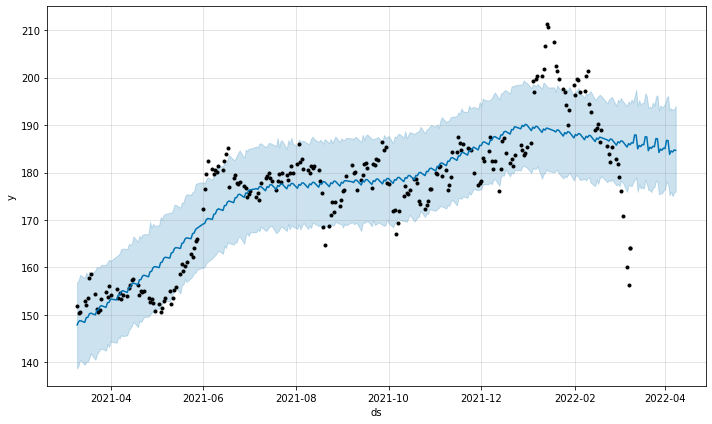

In [ ]:
figure = m_Prophet.plot(forecast, xlabel='ds', ylabel='y')

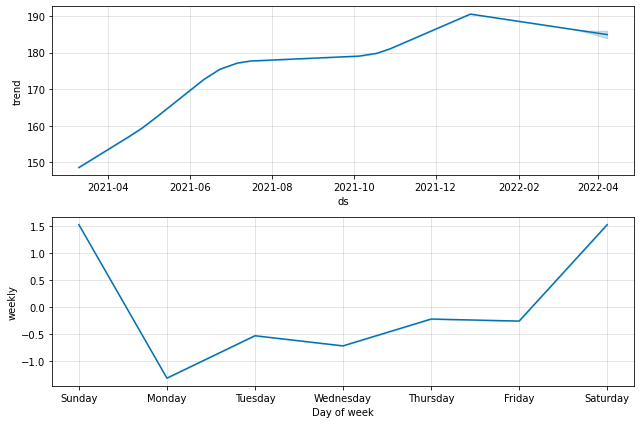

In [ ]:
fugure2= m_Prophet.plot_components(forecast)

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>